<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Lab7" data-toc-modified-id="Lab7-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Lab7</a></span><ul class="toc-item"><li><span><a href="#Data-processing" data-toc-modified-id="Data-processing-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Data processing</a></span></li><li><span><a href="#Gaussian-mixture-model" data-toc-modified-id="Gaussian-mixture-model-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Gaussian mixture model</a></span></li><li><span><a href="#logic-regession" data-toc-modified-id="logic-regession-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>logic regession</a></span></li></ul></li></ul></div>

### Lab7
 Abalone data

* Student ID:192050223
* First Name:Liu
* Last Name: Jun 

1. Investigate features of your variant:

- **Draw histograms for features**

- **Draw scatter plot matrix of features.**

- **Write comments about your investigation: what features are most useful for solving the problem and why, how features are distributed in the data.**

4. Investigate the API of probabilistic models in scikit-learn and train models for your task.

**You need to try train *Gaussian mixture model* and *Logistic regression model*.**

Please, use this articles as the starting point of your investigation:

- https://scikit-learn.org/stable/modules/mixture.html

- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

5.**Estimate the results of training.**

6. **Try to change parameters of training, apply transformations to features or create new features to achieve better results.**

7. **Draw likelihood plot for you task and try to define outliers in the data.**

8. **Write a short report in your notebook about the results of the experiment.**
Attribute information:

   Given is the attribute name, attribute type, the measurement unit and a
   brief description.  The number of rings is the value to predict: either
   as a continuous value or as a classification problem.

	Name		Data Type	Meas.	Description
	----		---------	-----	-----------
	Sex		nominal			M, F, and I (infant)
	Length		continuous	mm	Longest shell measurement
	Diameter	continuous	mm	perpendicular to length
	Height		continuous	mm	with meat in shell
	Whole weight	continuous	grams	whole abalone
	Shucked weight	continuous	grams	weight of meat
	Viscera weight	continuous	grams	gut weight (after bleeding)
	Shell weight	continuous	grams	after being dried
	Rings		integer			+1.5 gives the age in years 

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

#### Data processing

In [2]:
names=['Sex', 'Length','Diameter', 'Height','Whole weight', 'Shucked weight','Viscera weight', 'Shell weight', 'Rings']
df = pd.read_csv("./abalone.data", header=0, names = names)
df.tail()

Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
4171   F   0.565     0.450   0.165        0.8870          0.3700   
4172   M   0.590     0.440   0.135        0.9660          0.4390   
4173   M   0.600     0.475   0.205        1.1760          0.5255   
4174   F   0.625     0.485   0.150        1.0945          0.5310   
4175   M   0.710     0.555   0.195        1.9485          0.9455   

      Viscera weight  Shell weight  Rings  
4171          0.2390        0.2490     11  
4172          0.2145        0.2605     10  
4173          0.2875        0.3080      9  
4174          0.2610        0.2960     10  
4175          0.3765        0.4950     12

Investigate features of your variant 
Draw histograms for features


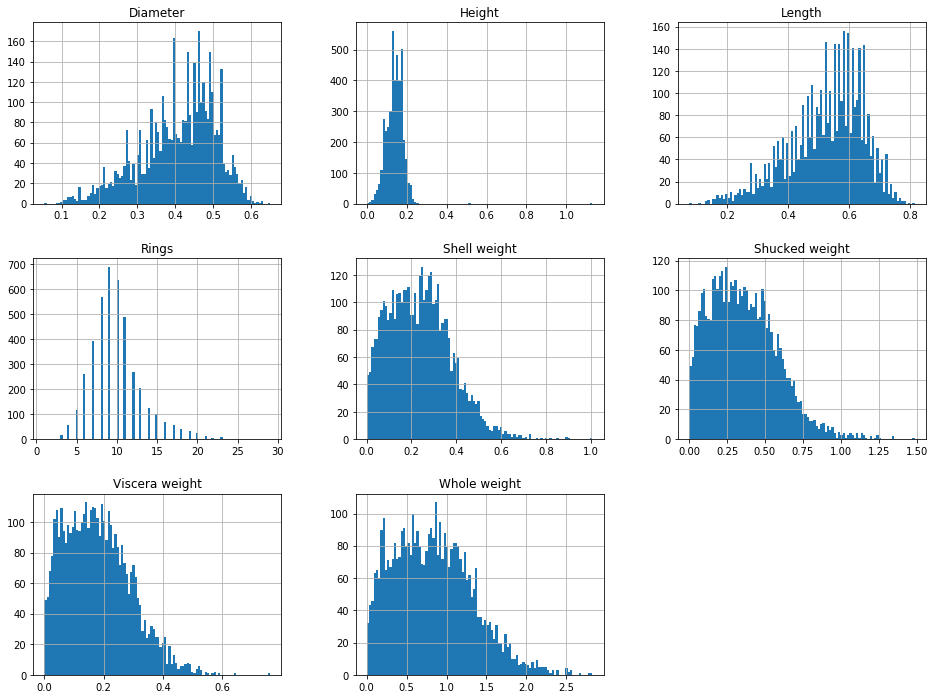

In [3]:
df.hist(bins = 100,figsize  = (16, 12))
# print(df.info)
print("Investigate features of your variant \nDraw histograms for features")
plt.show()

In [4]:
# df.iloc[:,0:-1] = OrdinalEncoder().fit_transform(df.iloc[:,0:-1])
# df.tail()

In [5]:
corr_matrix = df.corr()
corr_matrix["Rings"].sort_values(ascending=False)
# the sex has little influence to the Class so we dont use it as a featrue

Rings             1.000000
Shell weight      0.628031
Diameter          0.575005
Height            0.558109
Length            0.557123
Whole weight      0.540818
Viscera weight    0.504274
Shucked weight    0.421256
Name: Rings, dtype: float64

In [6]:
df = df.iloc[:,1:]
target = df.iloc[:,-1]

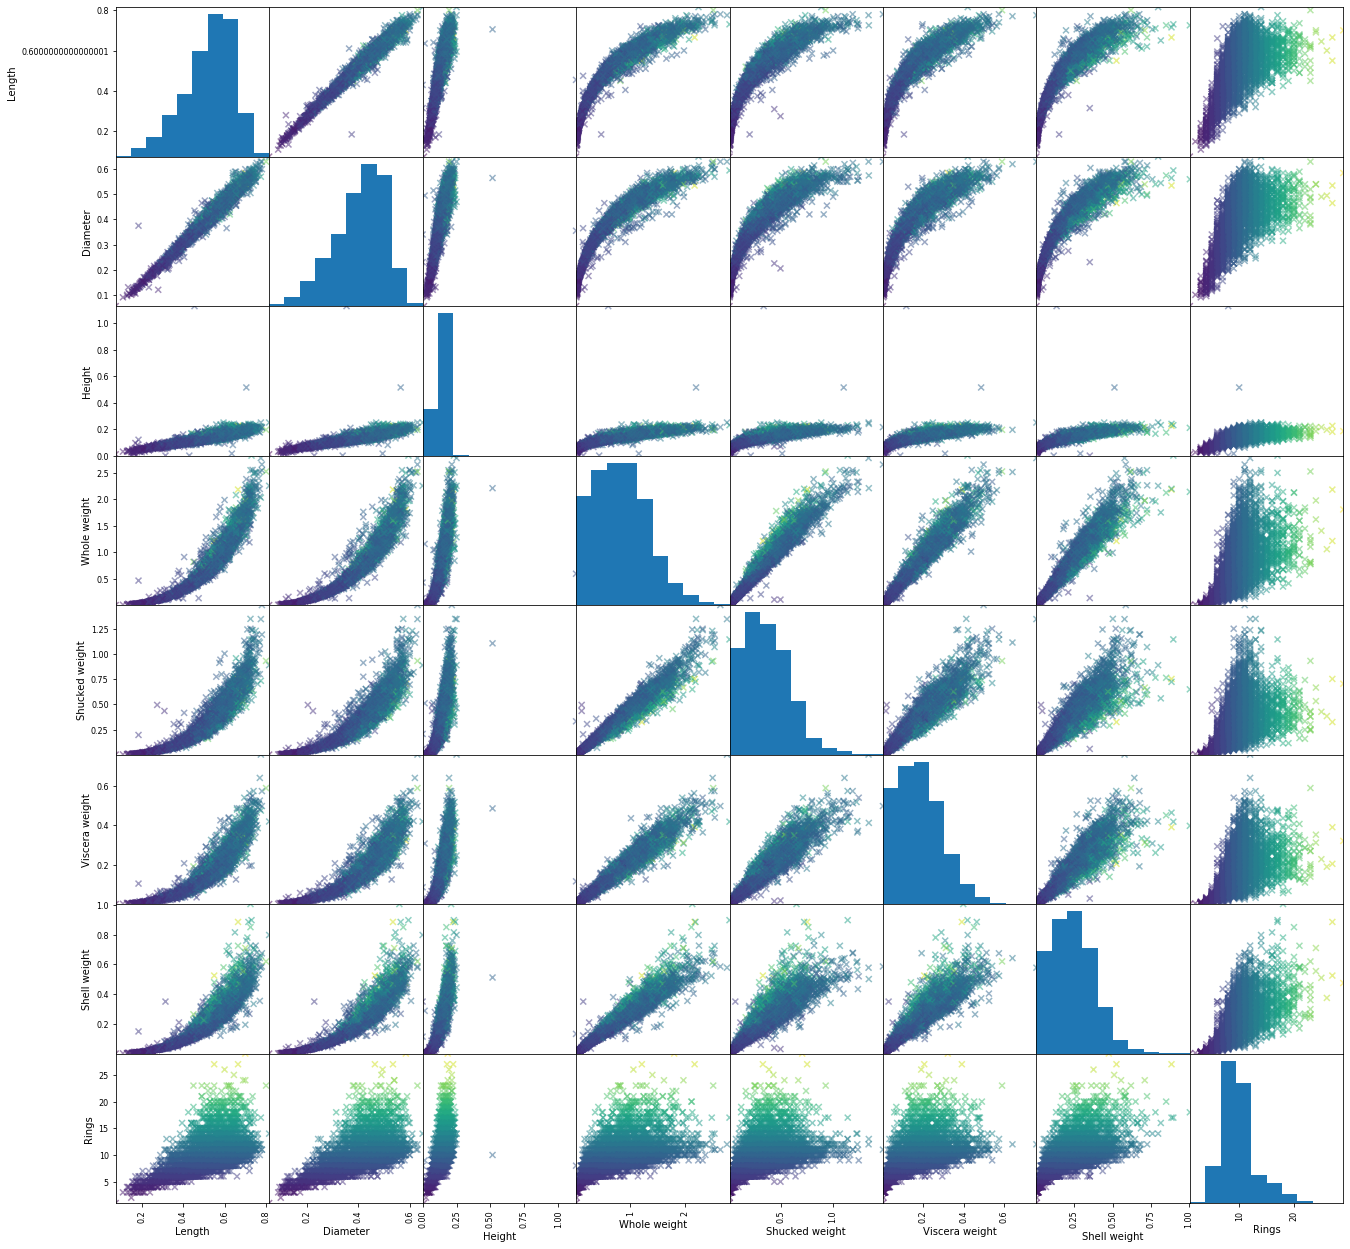

In [7]:
# make a scatter plot df.Rings.apply(lambda x:colors[x])
pd.plotting.scatter_matrix(df,figsize=[22,22],marker='x',c=target,range_padding=0)
plt.show()

In [8]:
dfback = df

In [25]:
df.loc[df["Rings"]<=8, 'Rings'] = 1#推荐使用.loc
df.loc[(df["Rings"] > 8) &(df["Rings"] <= 11),'Rings'] = 2
df.loc[df["Rings"] > 11, 'Rings'] = 3 
print(df.shape)
X = df.values[:,0:-1]
print(X.shape)
y = df.values[:,-1]
# print(y)
df.tail()


(4176, 8)
(4176, 7)


Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
4171   0.565     0.450   0.165        0.8870          0.3700          0.2390   
4172   0.590     0.440   0.135        0.9660          0.4390          0.2145   
4173   0.600     0.475   0.205        1.1760          0.5255          0.2875   
4174   0.625     0.485   0.150        1.0945          0.5310          0.2610   
4175   0.710     0.555   0.195        1.9485          0.9455          0.3765   

      Shell weight  Rings  
4171        0.2490      2  
4172        0.2605      2  
4173        0.3080      2  
4174        0.2960      2  
4175        0.4950      3

In [26]:
df.Rings.value_counts()

2    1810
1    1407
3     959
Name: Rings, dtype: int64

In [27]:
df.head()

Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
0   0.350     0.265   0.090        0.2255          0.0995          0.0485   
1   0.530     0.420   0.135        0.6770          0.2565          0.1415   
2   0.440     0.365   0.125        0.5160          0.2155          0.1140   
3   0.330     0.255   0.080        0.2050          0.0895          0.0395   
4   0.425     0.300   0.095        0.3515          0.1410          0.0775   

   Shell weight  Rings  
0         0.070      1  
1         0.210      2  
2         0.155      2  
3         0.055      1  
4         0.120      1

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42,test_size=0.2)

In [29]:
X_train.shape

(3340, 7)

Automatically created module for IPython interactive environment


D:\les\ide\lib\site-packages\ipykernel_launcher.py:53: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


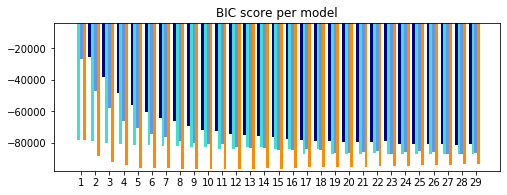

In [30]:
import numpy as np
import itertools

from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn import mixture

print(__doc__)

n_samples = 1000

np.random.seed(0)


lowest_bic = np.infty
bic = []
n_components_range = range(1,30)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(n_components=n_components,
                                      covariance_type=cv_type)
        gmm.fit(X_train)
        bic.append(gmm.bic(X_train))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm

bic = np.array(bic)
color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue',
                              'darkorange'])
clf = best_gmm
bars = []

# Plot the BIC scores
plt.figure(figsize=(8, 6))
spl = plt.subplot(2, 1, 1)
for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
    xpos = np.array(n_components_range) + .2 * (i - 2)
    bars.append(plt.bar(xpos, bic[i * len(n_components_range):
                                  (i + 1) * len(n_components_range)],
                        width=.2, color=color))
plt.xticks(n_components_range)
plt.ylim([bic.min() * 1.01 - .01 * bic.max(), bic.max()])
plt.title('BIC score per model')
xpos = np.mod(bic.argmin(), len(n_components_range)) + .65 +\
    .2 * np.floor(bic.argmin() / len(n_components_range))

# Plot the winner
splot = plt.subplot(2, 1, 1)
# Y_ = clf.predict(X_train)

plt.show()

In [33]:
best_gmm

# GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
#                 means_init=None, n_components=10, n_init=1,
#                 precisions_init=None, random_state=None, reg_covar=1e-06,
#                 tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
#                 weights_init=None)

GaussianMixture(covariance_type='spherical', init_params='kmeans', max_iter=100,
                means_init=None, n_components=29, n_init=1,
                precisions_init=None, random_state=None, reg_covar=1e-06,
                tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
                weights_init=None)

In [49]:
best_gmm = mixture.GaussianMixture(n_components=3,
covariance_type='spherical')
best_gmm.fit(X_train)

GaussianMixture(covariance_type='spherical', init_params='kmeans', max_iter=100,
                means_init=None, n_components=3, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [50]:
colors = ['navy', 'turquoise', 'darkorange', 'turquoise', 'darkorange', 'turquoise', 'darkorange', 'turquoise', 'darkorange','navy']

In [51]:
# for n,color in enumerate(y):
#         data = X_test[y_test == n]
#         plt.scatter(data[:, 0], data[:, 1], marker='x', color=y)

y_train_pred = best_gmm.predict(X_train)
print(y_train_pred)

trian_accuracy = np.mean(y_train_pred.ravel() == y_train.ravel()) * 100
print('Train accuracy: %.1f' % trian_accuracy)
# plt.text(0.05, 0.9, 'Train accuracy: %.1f' % train_accuracy)

y_test_pred = best_gmm.predict(X_test)
test_accuracy = np.mean(y_test_pred.ravel() == y_test.ravel()) * 100
# plt.text(0.05, 0.8, 'Test accuracy: %.1f' % test_accuracy)
print('Test accuracy: %.1f' % test_accuracy)

# plt.xticks(())
# plt.yticks(())
# plt.title("Hel")

[0 1 1 ... 0 0 2]
Train accuracy: 43.2
Test accuracy: 42.7



* BIC Can Be used to evaluate the selection of the best number of GMM categories. KMEANS is a special case of GMM. GMM is a more general cluster. When the gauss variance in GMM degenerates to zero, it's KMEANS

* likeilhood plot

In [19]:
asd=clf.predict_proba(X)
asd

array([[2.15860896e-032, 4.63754168e-003, 4.01027597e-149, ...,
        2.21131445e-010, 1.76656389e-013, 2.03340660e-005],
       [4.79614219e-003, 5.51850734e-003, 1.66714574e-038, ...,
        9.22737927e-002, 3.40201397e-021, 1.05706621e-032],
       [1.43911394e-009, 8.61204535e-001, 1.66195735e-079, ...,
        8.88646214e-004, 2.11241535e-026, 3.13806545e-008],
       ...,
       [8.27181901e-001, 3.70377616e-021, 7.97977059e-018, ...,
        1.32128340e-001, 1.03038678e-149, 1.25749923e-030],
       [5.23001000e-001, 2.41122818e-013, 1.36646806e-015, ...,
        8.29110316e-002, 2.53859141e-078, 3.49080190e-025],
       [1.00505910e-003, 8.70203943e-136, 4.51597678e-003, ...,
        3.32671786e-008, 1.67166759e-245, 9.06590613e-151]])

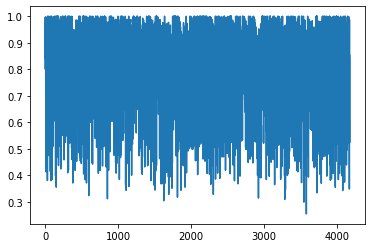

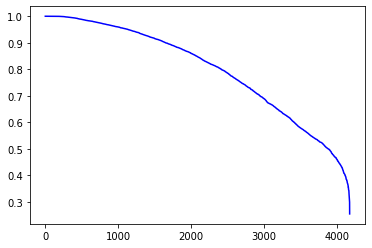

In [20]:
value=[]
index=[]
for i,er in enumerate(asd):
    value.append(np.max(er))
    index.append(i)
    
plt.plot(index,value)
plt.show()
value.sort(reverse=True)
plt.plot(index,value,color='blue')#likelihood plot
plt.show()

#### Gaussian mixture model

using the L1
$$\min _{w, c}\|w\|_{1}+C \sum_{i=1}^{n} \log \left(\exp \left(-y_{i}\left(X_{i}^{T} w+c\right)\right)+1\right)$$

####  logic regession

Automatically created module for IPython interactive environment
Dataset, train_samples=2923, n_features=7, n_classes=29
[model=One versus Rest, solver=saga] Number of epochs: 1
[model=One versus Rest, solver=saga] Number of epochs: 2
[model=One versus Rest, solver=saga] Number of epochs: 4
[model=One versus Rest, solver=saga] Number of epochs: 8
[model=One versus Rest, solver=saga] Number of epochs: 16
[model=One versus Rest, solver=saga] Number of epochs: 100
Test accuracy for model ovr: 0.2610
% non-zero coefficients for model ovr, per class:
 [ 0.         42.85714286 42.85714286 14.28571429 42.85714286 71.42857143
 71.42857143 71.42857143 71.42857143 85.71428571 42.85714286 28.57142857
 42.85714286 28.57142857 42.85714286 42.85714286 42.85714286 42.85714286
 28.57142857 28.57142857 14.28571429 14.28571429  0.          0.
  0.        ]
Run time (100 epochs) for model ovr:1.04
[model=Multinomial, solver=saga] Number of epochs: 1
[model=Multinomial, solver=saga] Number of epochs: 3
[m

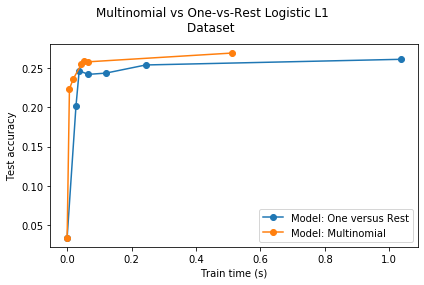

In [21]:
from sklearn.feature_selection import SelectFromModel
from sklearn.exceptions import ConvergenceWarning
import timeit
import warnings
print(__doc__)

warnings.filterwarnings("ignore", category=ConvergenceWarning,
                        module="sklearn")
solver = 'saga' 

t0 = timeit.default_timer()

X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42,test_size=0.3)
train_samples, n_features = X_train.shape
n_classes = 29

print('Dataset, train_samples=%i, n_features=%i, n_classes=%i'
      % (train_samples, n_features, n_classes))

models = {'ovr': {'name': 'One versus Rest', 'iters': [1, 2, 4, 8,16,100]},
          'multinomial': {'name': 'Multinomial', 'iters': [1, 3, 7, 9,11,100]}}

for model in models:
    # Add initial chance-level values for plotting purpose
    accuracies = [1 / n_classes]
    times = [0]
    densities = [1]

    model_params = models[model]

    # Small number of epochs for fast runtime
    for this_max_iter in model_params['iters']:
        print('[model=%s, solver=%s] Number of epochs: %s' %
              (model_params['name'], solver, this_max_iter))
        lr = LogisticRegression(solver=solver,
                                C=1,
                                multi_class=model,
                                penalty='l1',
                                max_iter=this_max_iter,
                                random_state=42,
                                )
        t1 = timeit.default_timer()
        lr.fit(X_train, y_train)
        train_time = timeit.default_timer() - t1

        y_pred = lr.predict(X_test)
        accuracy = np.sum(y_pred == y_test) / y_test.shape[0]
        density = np.mean(lr.coef_ != 0, axis=1) * 100
        
        accuracies.append(accuracy)
        densities.append(density)
        times.append(train_time)
        
    models[model]['times'] = times
    models[model]['densities'] = densities
    models[model]['accuracies'] = accuracies
    
    print('Test accuracy for model %s: %.4f' % (model, accuracies[-1]))
    print('%% non-zero coefficients for model %s, '
          'per class:\n %s' % (model, densities[-1]))
    print('Run time (%i epochs) for model %s:'
          '%.2f' % (model_params['iters'][-1], model, times[-1]))

fig = plt.figure()
ax = fig.add_subplot(111)

for model in models:
    name = models[model]['name']
    times = models[model]['times']
    accuracies = models[model]['accuracies']
    ax.plot(times, accuracies, marker='o',
            label='Model: %s' % name)
    ax.set_xlabel('Train time (s)')
    ax.set_ylabel('Test accuracy')
ax.legend()
fig.suptitle('Multinomial vs One-vs-Rest Logistic L1\n'
             'Dataset %s' % '')
fig.tight_layout()
fig.subplots_adjust(top=0.85)
run_time = timeit.default_timer() - t0
print('Example run in %.3f s' % run_time)
plt.show()

liblinear applies the coordinate descent algorithm (Coordinate Descent, CD), and is based on the high-performance C ++ library LIBLINEAR library included in scikit-learn. However, the model trained by the CD algorithm is not a multi-class model in the true sense, but this optimization problem is decomposed based on the "one-vs-rest" idea, and a binary classifier is trained for each category. Because the LogisticRegression instance object that uses the solver at the bottom is a multivariate classifier. sklearn.svm.l1_min_c can calculate the lower bound of C when using L1 to avoid the model being empty (ie, the weight of all feature components is zero).

The lbfgs, sag and newton-cg solvers only support L2 penalty terms and no penalty terms, and converge faster for certain high-dimensional data. The multi_class parameter of these solvers is set to multinomial to train a true polynomial logistic regression , and its predicted probability is more accurate than the default “one-vs-rest” setting.

The sag solver is based on the Stochastic Average Gradient descent algorithm . It performs faster on large data sets, which means that the sample size is large and the number of features is large.

The saga solver  is a variant of sag that supports non-smooth L1 regular option penalty = "l1". Therefore, for sparse polynomial logistic regression, this solver is often used. The saga solver is the only solver that supports the elastic network regular option.

lbfgs is an optimization algorithm similar to Broyden–Fletcher–Goldfarb–Shanno algorithm , which belongs to the quasi-Newton method. The lbfgs solver is recommended for smaller data sets. For larger data sets, its performance will be affected. 